## Analysis of Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
df = pd.read_csv("P:\Artificial Intelligence\Machine Learning\Dataset\Churn_Modelling.csv", index_col="CustomerId")
df

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,9998,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


## Dataset Insights

In [4]:
print("General information about the dateset: \n")
print(df.info(), "\n")
print("Shape of a dataset:",df.shape, "\n")
print("Total count of dataset: \n",df.count(), "\n")
print("General description about dataset: \n", df.describe())

General information about the dateset: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB
None 

Shape of a dataset: (10000, 13) 

Total count of dataset: 
 RowNumber          10

## Data cleaning

In [5]:
df1 = df.drop(["Surname", "Geography", "Gender", "HasCrCard", "IsActiveMember", "Exited"], axis=1)
df1

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CustomerId,,,,,,,
15634602,1,619,42,2,0.00,1,101348.88
15647311,2,608,41,1,83807.86,1,112542.58
15619304,3,502,42,8,159660.80,3,113931.57
15701354,4,699,39,1,0.00,2,93826.63
15737888,5,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...,...
15606229,9996,771,39,5,0.00,2,96270.64
15569892,9997,516,35,10,57369.61,1,101699.77
15584532,9998,709,36,7,0.00,1,42085.58


In [6]:
print("General description about dataset: \n", df1.describe())

General description about dataset: 
          RowNumber   CreditScore           Age        Tenure        Balance  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000    650.528800     38.921800      5.012800   76485.889288   
std     2886.89568     96.653299     10.487806      2.892174   62397.405202   
min        1.00000    350.000000     18.000000      0.000000       0.000000   
25%     2500.75000    584.000000     32.000000      3.000000       0.000000   
50%     5000.50000    652.000000     37.000000      5.000000   97198.540000   
75%     7500.25000    718.000000     44.000000      7.000000  127644.240000   
max    10000.00000    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts  EstimatedSalary  
count   10000.000000     10000.000000  
mean        1.530200    100090.239881  
std         0.581654     57510.492818  
min         1.000000        11.580000  
25%         1.000000     51002.110000  
50%        

In [7]:
df1.iloc[:, [1,2,3,5]].sum()

CreditScore      6505288
Age               389218
Tenure             50128
NumOfProducts      15302
dtype: int64

In [8]:
df1.iloc[:, [1,2,3,5]].corr()

,CreditScore,Age,Tenure,NumOfProducts
CreditScore,1.000000,-0.003965,0.000842,0.012238
Age,-0.003965,1.000000,-0.009997,-0.030680
Tenure,0.000842,-0.009997,1.000000,0.013444
NumOfProducts,0.012238,-0.030680,0.013444,1.000000


In [9]:
df1.sort_index(1, ascending=True)

C:\Users\Aditya\AppData\Local\Temp/ipykernel_1584/3356703665.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  df1.sort_index(1, ascending=True)


,Age,Balance,CreditScore,EstimatedSalary,NumOfProducts,RowNumber,Tenure
CustomerId,,,,,,,
15634602,42,0.00,619,101348.88,1,1,2
15647311,41,83807.86,608,112542.58,1,2,1
15619304,42,159660.80,502,113931.57,3,3,8
15701354,39,0.00,699,93826.63,2,4,1
15737888,43,125510.82,850,79084.10,1,5,2
...,...,...,...,...,...,...,...
15606229,39,0.00,771,96270.64,2,9996,5
15569892,35,57369.61,516,101699.77,1,9997,10
15584532,36,0.00,709,42085.58,1,9998,7


In [10]:
df2 = df1.iloc[425:445: ]
df2

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CustomerId,,,,,,,
15784597,426,648,26,9,162923.85,1,98368.24
15652883,427,492,39,10,124576.65,2,148584.61
15806964,428,702,45,0,80793.58,1,27474.81
15576313,429,486,40,9,71340.09,1,76192.21
15806467,430,568,40,1,99282.63,1,134600.94
15597602,431,619,57,3,137946.39,1,72467.99
15743040,432,724,41,2,127892.57,2,199645.45
15705521,433,548,33,0,101084.36,1,42749.85
15595039,434,545,37,8,114754.08,1,136050.44


# Data Visualization

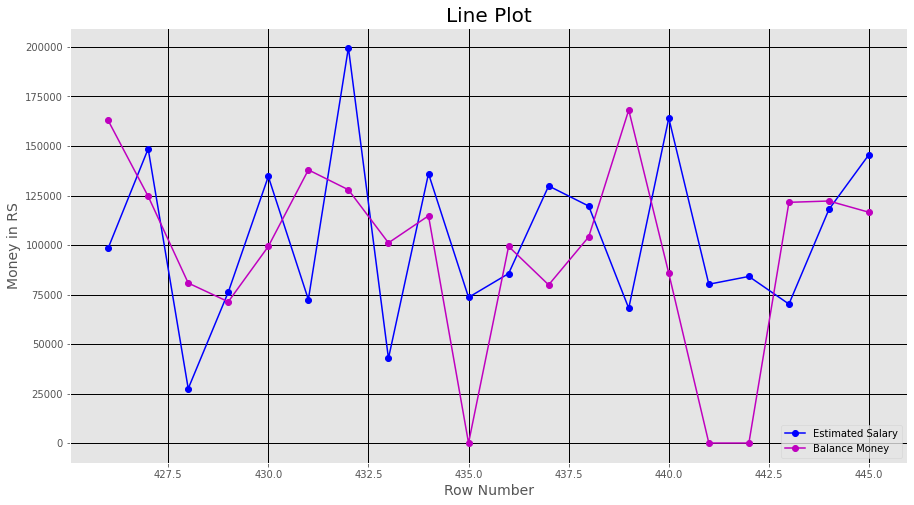

In [11]:
style.use("ggplot")
plt.figure(figsize=(15,8))
plt.plot(df2.RowNumber, df2.EstimatedSalary, color = "b", marker = "o", label = "Estimated Salary")
plt.plot(df2.RowNumber, df2.Balance, color = "m", marker = "o", label = "Balance Money")
plt.title("Line Plot", fontsize = 20)
plt.xlabel("Row Number", fontsize = 14)
plt.ylabel("Money in RS", fontsize = 14)
plt.legend(loc = 4)
plt.grid(color = "k", linewidth = 1)
plt.show()

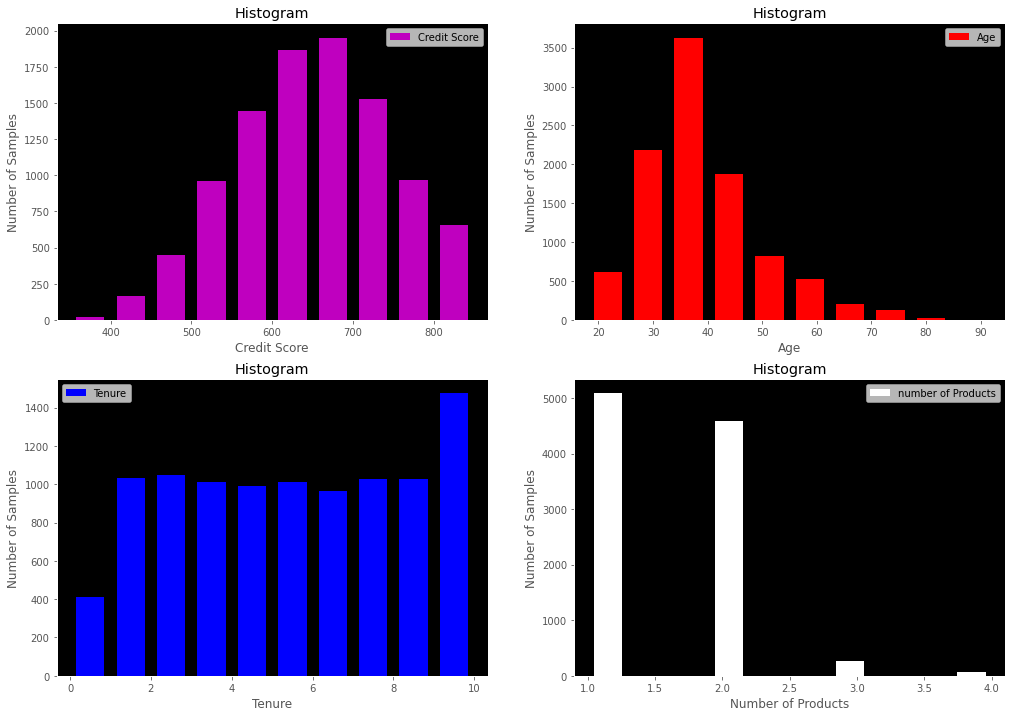

In [12]:
plt.figure(figsize=(17,12))

plt.subplot(2,2,1)
style.use("ggplot")
plt.hist(df1.CreditScore, color="m", rwidth= 0.7, align="mid", label = "Credit Score")
plt.title("Histogram")
plt.xlabel("Credit Score")
plt.ylabel("Number of Samples")
plt.grid(color = "k", linewidth = 1000)
plt.legend()


plt.subplot(2,2,2)
style.use("ggplot")
plt.hist(df1.Age, color="r", rwidth= 0.7, align="mid", label = "Age")
plt.title("Histogram")
plt.xlabel("Age")
plt.ylabel("Number of Samples")
plt.grid(color = "k", linewidth = 1000)
plt.legend()


plt.subplot(2,2,3)
style.use("ggplot")
plt.hist(df1.Tenure, color="b", rwidth= 0.7, align="mid", label = "Tenure")
plt.title("Histogram")
plt.xlabel("Tenure")
plt.ylabel("Number of Samples")
plt.grid(color = "k", linewidth = 1000)
plt.legend()


plt.subplot(2,2,4)
style.use("ggplot")
plt.hist(df1.NumOfProducts, color="w", rwidth= 0.7, align="mid", label = "number of Products")
plt.title("Histogram")
plt.xlabel("Number of Products")
plt.ylabel("Number of Samples")
plt.grid(color = "k", linewidth = 1000)
plt.legend()
plt.show()


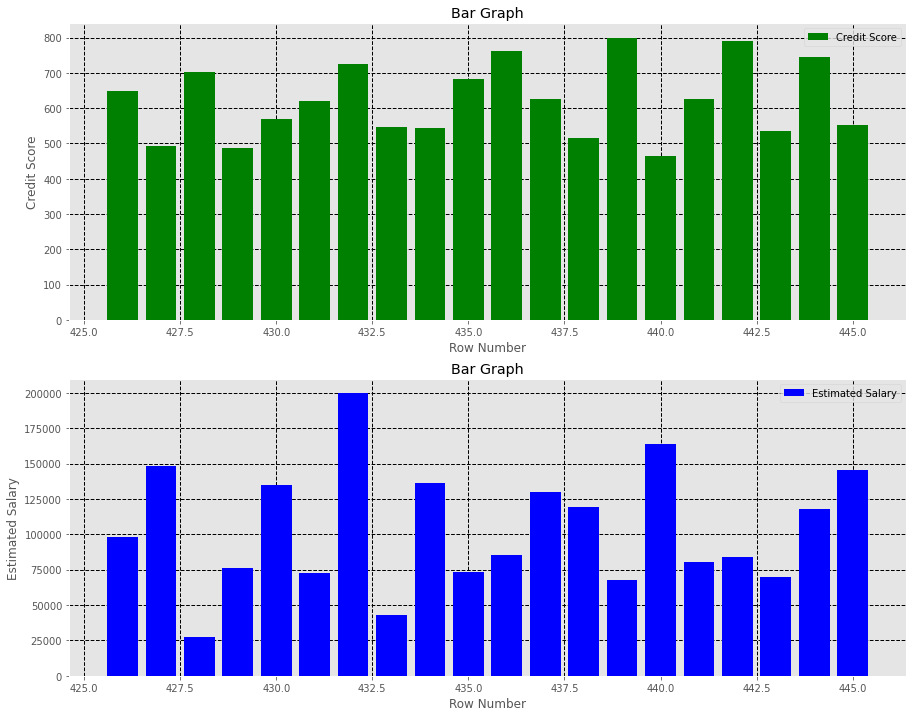

In [28]:
plt.figure(figsize= (15, 12))

plt.subplot(2,1,1)
style.use("ggplot")
plt.bar(df2.RowNumber, df2.CreditScore, color = "g", linewidth = 0.8, label = "Credit Score")
plt.title("Bar Graph")
plt.xlabel("Row Number")
plt.ylabel("Credit Score")
plt.legend()
plt.grid(color = "k", linestyle = "--", linewidth = 1)

plt.subplot(2,1,2)
style.use("ggplot")
plt.bar(df2.RowNumber, df2.EstimatedSalary, color = "b", linewidth = 0.8, label = "Estimated Salary")
plt.title("Bar Graph")
plt.xlabel("Row Number")
plt.ylabel("Estimated Salary")
plt.legend()
plt.grid(color = "k", linestyle = "--", linewidth = 1)

plt.show()

In [32]:
df3 = df1.iloc[1000:2000, :]
df3

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CustomerId,,,,,,,
15691111,1001,648,42,8,121980.56,2,4027.02
15592089,1002,788,43,10,0.00,2,116111.51
15633897,1003,725,39,1,50880.98,2,184023.54
15701301,1004,646,42,3,175159.90,2,67124.48
15723685,1005,601,26,7,105514.69,2,50070.59
...,...,...,...,...,...,...,...
15617648,1996,584,44,5,95671.75,2,106564.88
15755678,1997,534,62,2,0.00,2,42763.12
15624781,1998,672,34,1,142151.75,2,168753.34


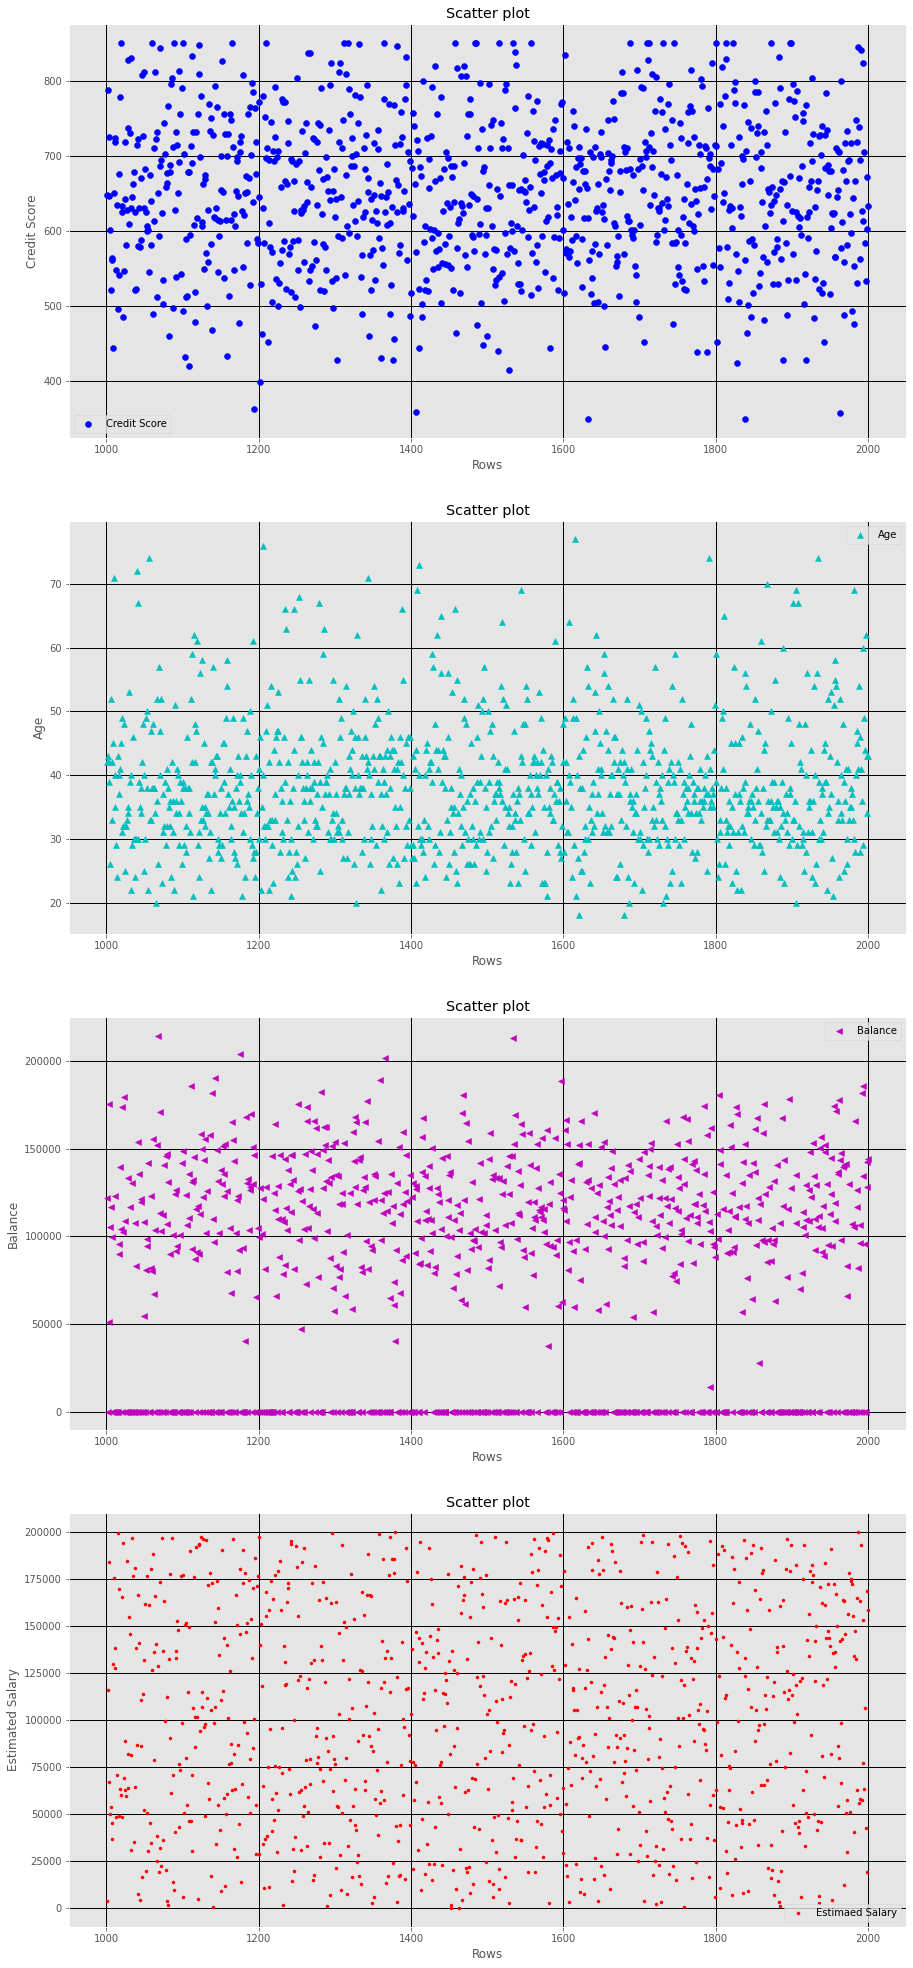

In [52]:
plt.figure(figsize= (15,35))

plt.subplot(4,1,1)

style.use("ggplot")
plt.scatter(df3.RowNumber, df3.CreditScore, color = "b", marker = "o", label = "Credit Score")
plt.title("Scatter plot")
plt.xlabel("Rows")
plt.ylabel("Credit Score")
plt.legend()
plt.grid(color = "k", linewidth = 1)

plt.subplot(4,1,2)
style.use("ggplot")
plt.scatter(df3.RowNumber, df3.Age, color = "c", marker = "^", label = "Age")
plt.title("Scatter plot")
plt.xlabel("Rows")
plt.ylabel("Age")
plt.legend()
plt.grid(color = "k", linewidth = 1)

plt.subplot(4,1,3)
style.use("ggplot")
plt.scatter(df3.RowNumber, df3.Balance, color = "m", marker = "<", label = "Balance")
plt.title("Scatter plot")
plt.xlabel("Rows")
plt.ylabel("Balance")
plt.legend()
plt.grid(color = "k", linewidth = 1)

plt.subplot(4,1,4)
style.use("ggplot")
plt.scatter(df3.RowNumber, df3.EstimatedSalary, color = "r", marker = ".", label = "Estimaed Salary")
plt.title("Scatter plot")
plt.xlabel("Rows")
plt.ylabel("Estimated Salary")
plt.legend()
plt.grid(color = "k", linewidth = 1)


plt.show()

In [57]:
df4 = df1.mean()
print(df4)




RowNumber            5000.500000
CreditScore           650.528800
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
EstimatedSalary    100090.239881
dtype: float64


In [67]:
lst1 = [df1["EstimatedSalary"].mean(), df1["Balance"].mean()]
lst1
label1 = ["Estimated Salary", "Balance"]

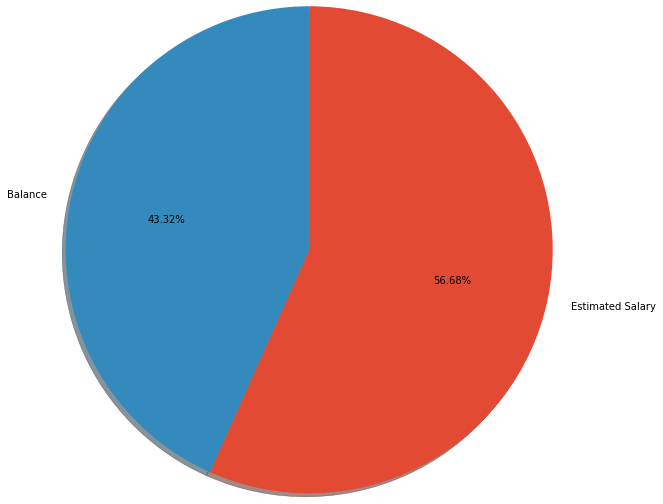

In [71]:
plt.figure(figsize= (15,8))
plt.pie(lst1, radius=1.4, labels= label1, autopct="%0.2f%%", shadow=True, startangle=90, counterclock=False)
plt.show()